# Drill: More clusters?
Your task is to take the  𝑘 -means code here and see what happens when you change the value of  𝑘 . What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

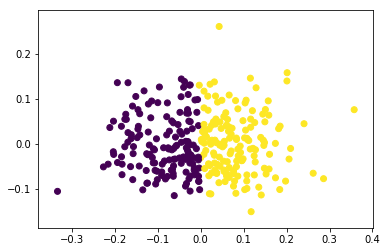

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [4]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      145    0
1        4  154


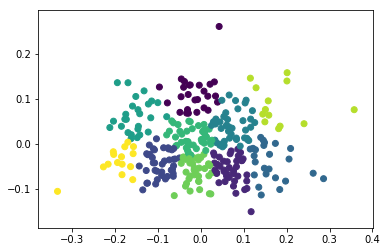

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  11
1       7  34
2      15  24
3       4  20
4      23  20
5      20   6
6      23  18
7      14  21
8       7   6
9      11   4


In [9]:
# Calculate predicted values with different values of K.
y_pred2 = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y))

In [10]:
# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred2))

Comparing k-means and mini batch k-means solutions:
col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      13   0  39   0   0  26  26  26   0  15
1      13  41   0  24  43   0  15   9  13   0


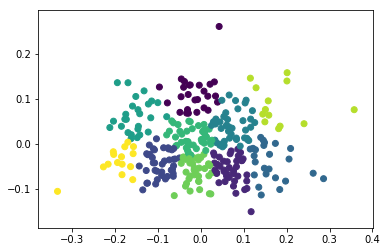

Comparing k-means clusters against the data:
col_0  0  1
row_0      
0      3  2
1      1  4
2      0  1
3      2  2
4      2  2
5      0  4
6      1  1
7      3  0
8      1  3
9      0  1
10     1  0
11     1  2
12     4  3
13     2  3
14     0  2
15     0  1
16     1  0
17     2  1
18     0  1
19     0  4
20     4  1
21     4  3
22     1  0
23     2  2
24     1  3
25     2  0
26     1  1
27     1  4
28     2  3
29     2  0
...   .. ..
70     1  3
71     2  0
72     3  2
73     0  1
74     1  3
75     2  2
76     1  1
77     0  1
78     1  4
79     2  0
80     2  1
81     0  1
82     1  2
83     2  1
84     1  2
85     2  1
86     1  0
87     3  0
88     0  1
89     1  1
90     0  1
91     2  1
92     0  1
93     1  1
94     0  2
95     1  3
96     1  1
97     4  1
98     0  2
99     0  3

[100 rows x 2 columns]


In [13]:
# Calculate predicted values with different values of K.
y_pred3 = KMeans(n_clusters=100, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred3, y))

In [12]:
# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred3))

Comparing k-means and mini batch k-means solutions:
col_0  0   1   2   3   4   5   6   7   8   ...  91  92  93  94  95  96  97  98  99
row_0                                      ...                                    
0       5   0   0   4   0   4   0   0   0  ...   3   0   0   0   0   2   5   0   0
1       0   5   1   0   4   0   2   3   4  ...   0   1   2   2   4   0   0   2   3

[2 rows x 100 columns]


# Conclusions

The two cluster model is more convincing because it has better accuracy and it's easy to interpret. However, more clusters could point to different tiers of risk factor and help identify a patient who may be more likely to develop heart disease. Computational time didn't increase much with more clusters. However, if there are more clusters and a larger batch size, computational time will increase.